In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
df=pd.read_excel("/content/Airlines+Data.xlsx")

In [3]:
df

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


# EDA

In [4]:
df.isna().sum()

Month         0
Passengers    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [6]:
df.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [7]:
df.rename({'Month':'Date'},axis=1,inplace=True)

In [8]:
df.head()

,Date,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [9]:
df["month"] = df.Date.dt.strftime("%b")
df["year"] = df.Date.dt.strftime("%Y")

In [10]:
df.head()

,Date,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995


In [11]:
heatmap_y_month = pd.pivot_table(data=df,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
heatmap_y_month

month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
year,,,,,,,,,,,,
1995,129,148,118,118,112,148,135,132,121,104,119,136
1996,135,170,140,126,115,170,149,141,125,114,133,158
1997,163,199,166,150,145,199,178,178,172,146,162,184
1998,181,242,194,180,171,230,218,193,183,172,191,209
1999,235,272,201,196,196,264,243,236,229,180,211,237
2000,227,293,229,188,204,302,264,235,234,203,229,259
2001,269,347,278,233,242,364,315,267,270,237,274,312
2002,313,405,306,277,284,413,374,317,318,271,306,355


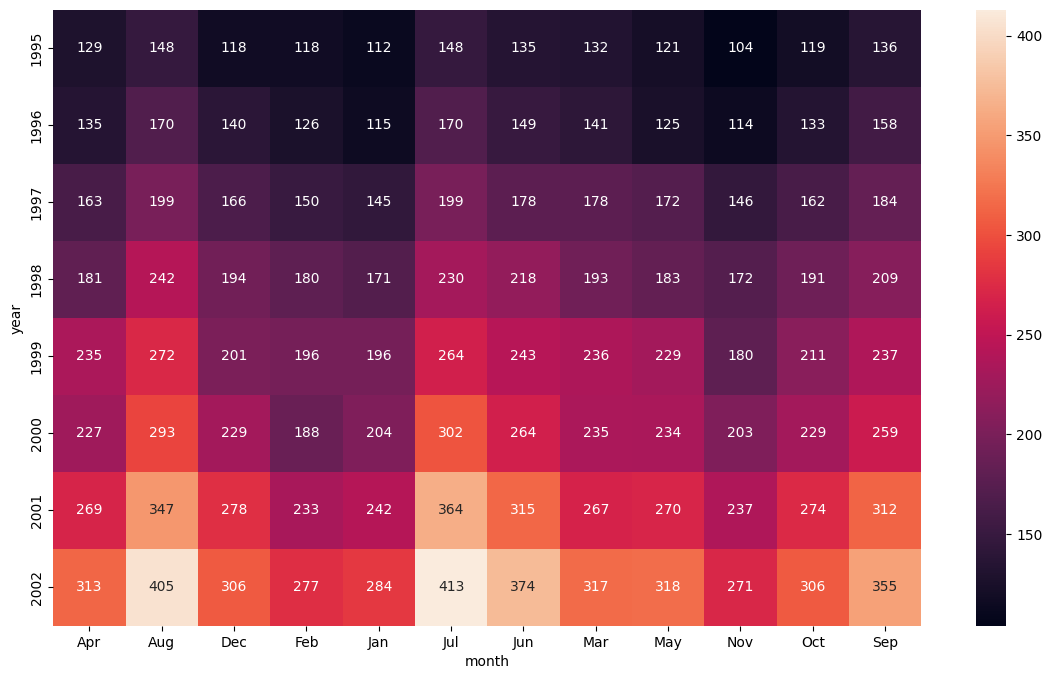

In [12]:
plt.figure(figsize=(14,8))
sns.heatmap(heatmap_y_month,annot=True,fmt="g")
plt.show()

<Axes: xlabel='year', ylabel='Passengers'>

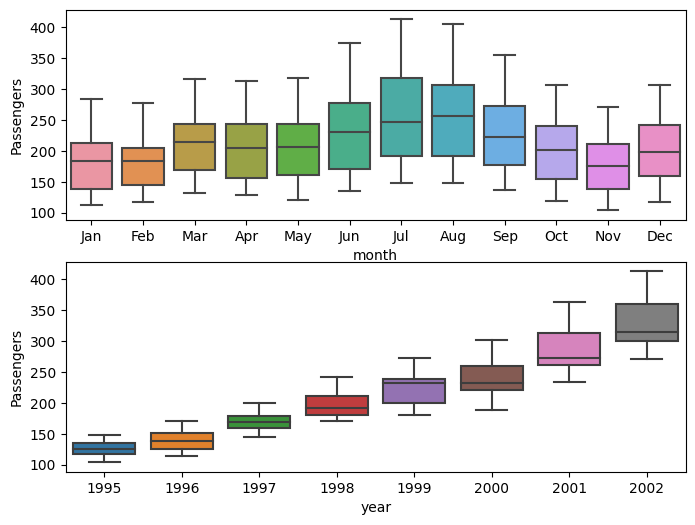

In [13]:
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=df)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=df)

<Axes: xlabel='year', ylabel='Passengers'>

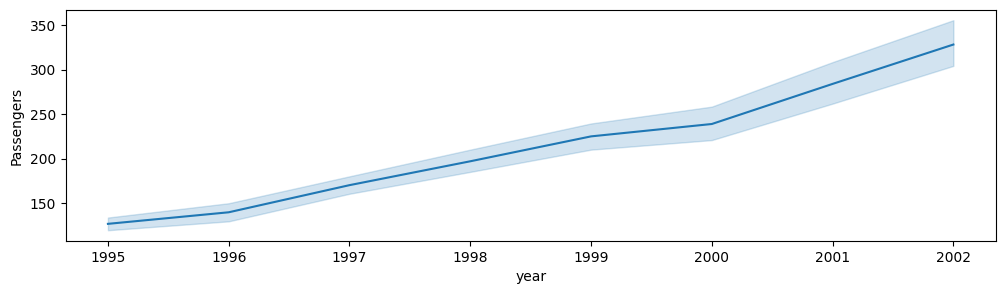

In [14]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=df)

<Axes: >

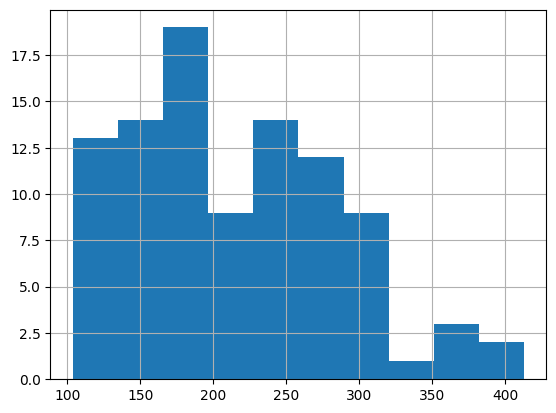

In [15]:
df.Passengers.hist()

<Axes: >

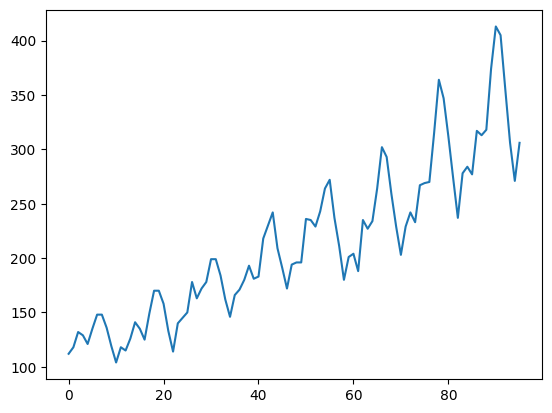

In [16]:
df.Passengers.plot()

# Moving Average

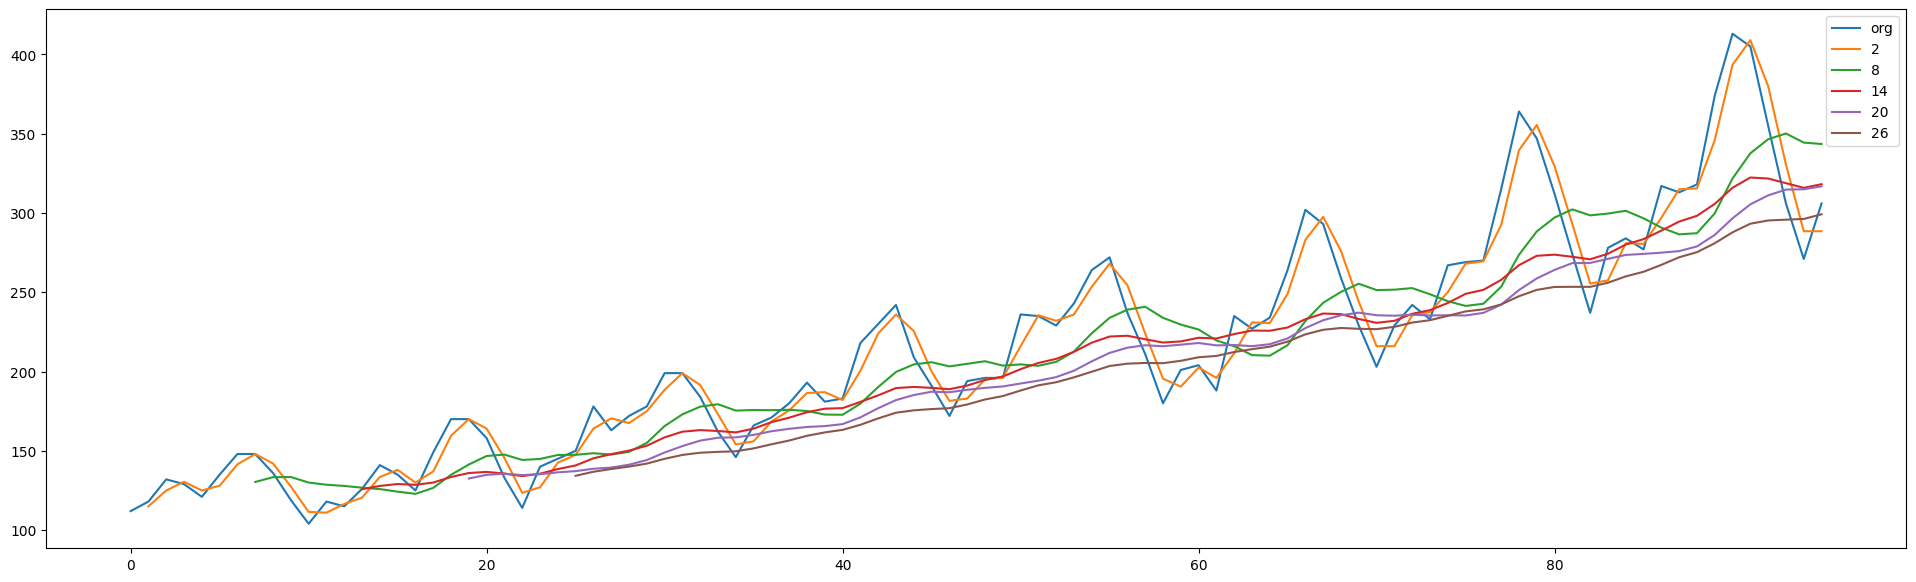

In [17]:
plt.figure(figsize=(24,7))
df.Passengers.plot(label="org")
for i in range(2,30,6):
    df["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')
plt.show()

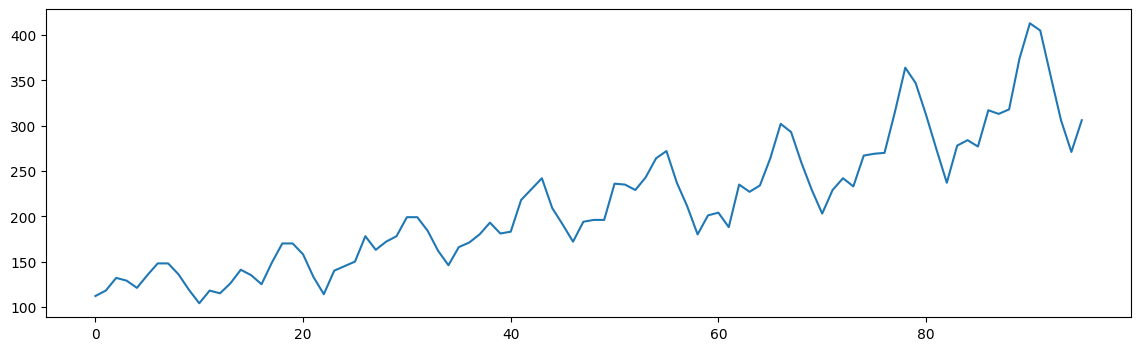

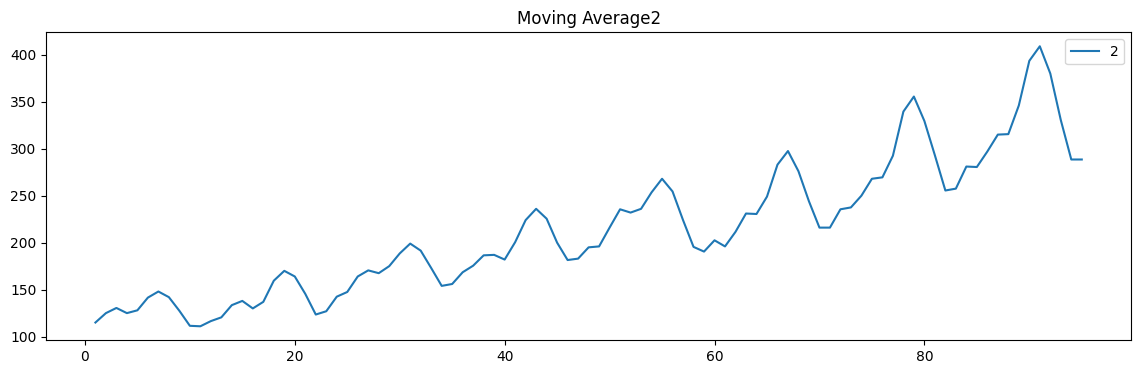

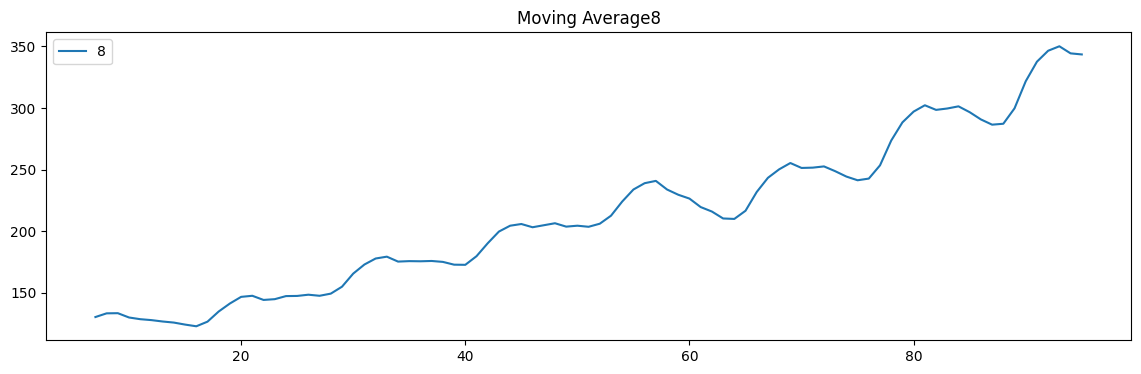

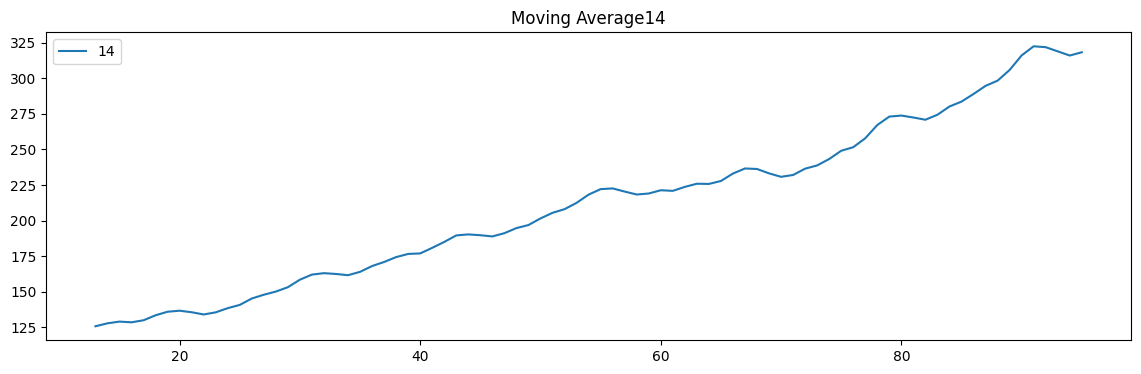

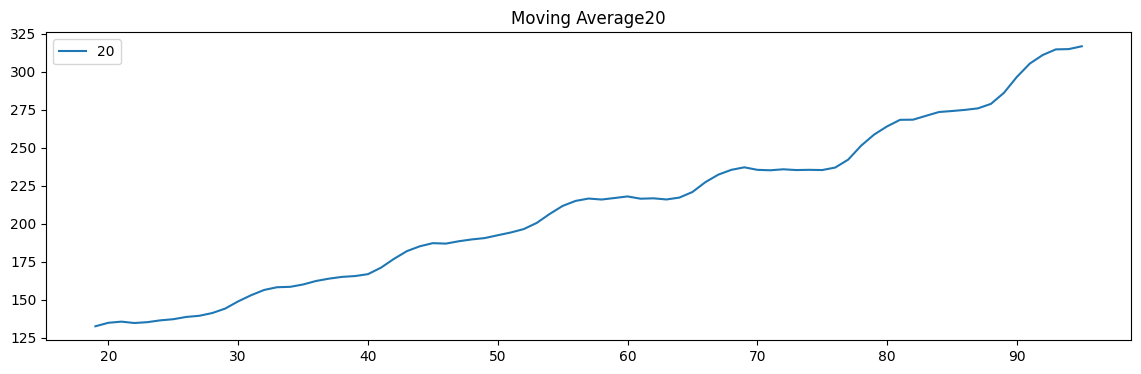

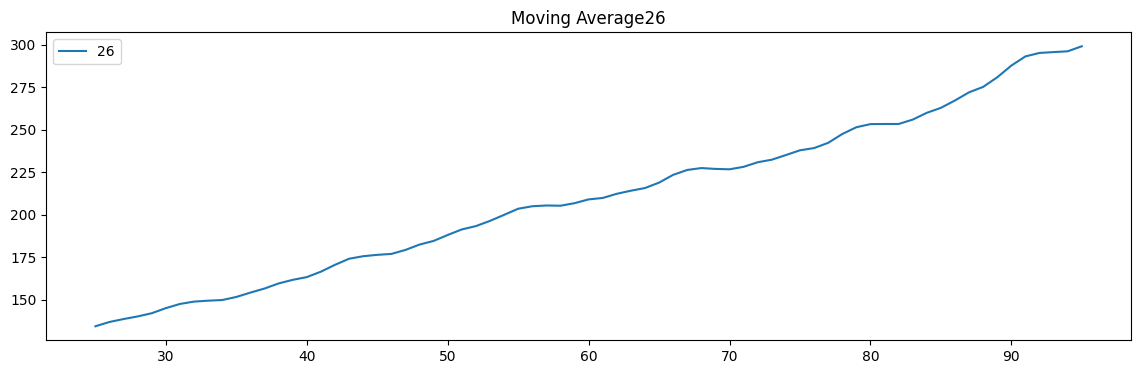

In [18]:
plt.figure(figsize=(14,4))
df.Passengers.plot(label="org")
for i in range(2,30,6):
    plt.figure(figsize=(14,4))
    df["Passengers"].rolling(i).mean().plot(label=str(i))
    plt.title("Moving Average"+str(i))
    plt.legend(loc='best')
    plt.show()

# Time Series Decomposition plot

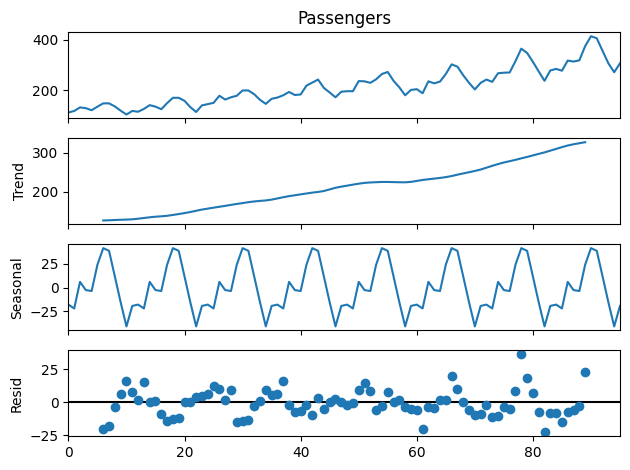

In [19]:
decompose_ts_add = seasonal_decompose(df.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

# ACF and PACF plots

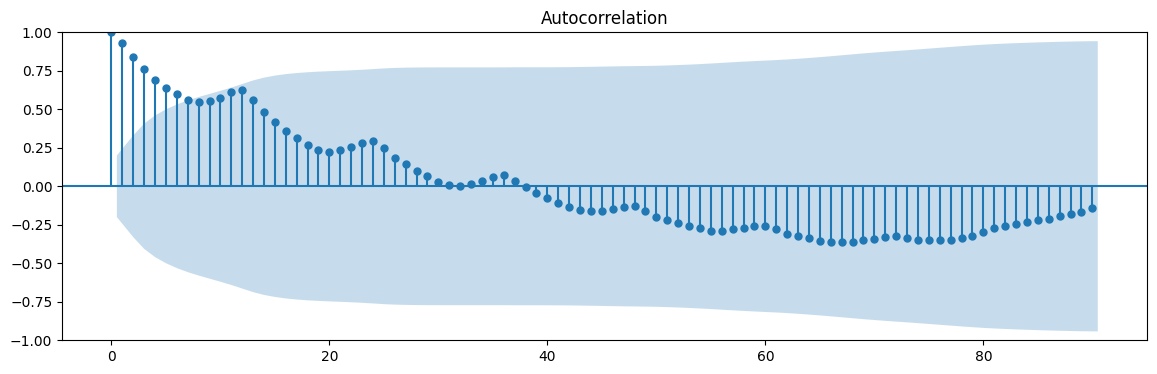

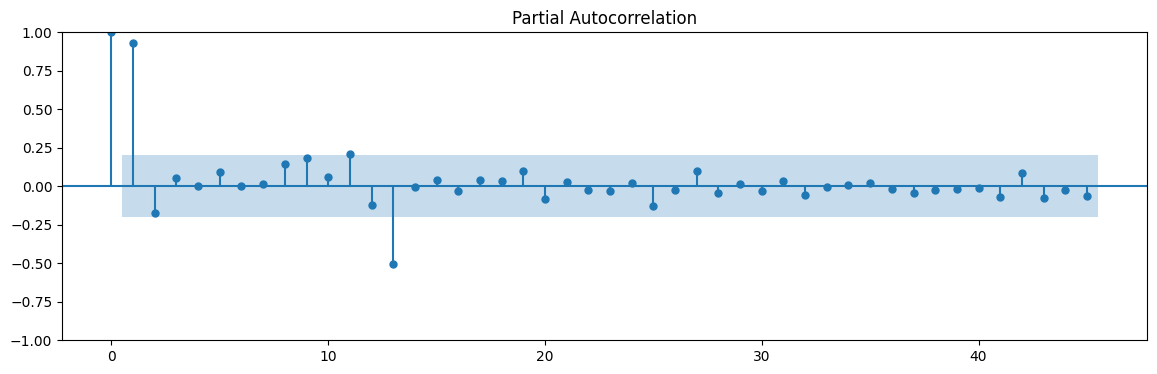

In [20]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
  plt.rc("figure",figsize=(14,4))
  tsa_plots.plot_acf(df.Passengers,lags=90)
  tsa_plots.plot_pacf(df.Passengers,lags=45)
  plt.show()

In [21]:
df.shape

(96, 4)

# Splitting the data

In [22]:
Train=df.head(72)
Test=df.tail(24)

In [23]:
Test

,Date,Passengers,month,year
72,2001-01-01,242,Jan,2001
73,2001-02-01,233,Feb,2001
74,2001-03-01,267,Mar,2001
75,2001-04-01,269,Apr,2001
76,2001-05-01,270,May,2001
77,2001-06-01,315,Jun,2001
78,2001-07-01,364,Jul,2001
79,2001-08-01,347,Aug,2001
80,2001-09-01,312,Sep,2001
81,2001-10-01,274,Oct,2001


# Evaluation metrics MAPE

In [24]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [25]:
#simple exponential smoothing
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
test_pred_ses=ses_model.forecast(24)
mape_ses=MAPE(pred_ses,Test.Passengers)
mape_ses

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


20.591879433296977

In [29]:
# Holt method
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_trend=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
mape_hw=MAPE(pred_hw,Test.Passengers)
mape_hw

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


41.15051047437214

In [30]:
#holt  winter exponential smoothing method with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
mape_hwe_mul_add=MAPE(pred_hwe_mul_add,Test.Passengers)
mape_hwe_mul_add

9.368409298996491

In [31]:
##holt winter exponential smoothing method with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(df.Passengers,seasonal="add",trend="add",seasonal_periods=12).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
mape_hwe_add_add=MAPE(pred_hwe_add_add,Test.Passengers)
mape_hwe_add_add

2.7367597870487823

In [32]:
hwe_model_add_add.forecast(10)

96     319.235270
97     311.528386
98     350.278691
99     346.984976
100    351.845022
101    403.925707
102    440.566797
103    427.446477
104    376.628169
105    329.767502
dtype: float64

In [33]:
table={"MODEL":pd.Series(['simple exponential smoothing','holt method','hwe_model_mul_add','hwe_model_add_add']),"MAPE_Values":pd.Series([mape_ses,mape_hw,mape_hwe_mul_add,mape_hwe_add_add])}
table_mape=pd.DataFrame(table)
table_mape.sort_values(['MAPE_Values'])

,MODEL,MAPE_Values
3,hwe_model_add_add,2.736760
2,hwe_model_mul_add,9.368409
0,simple exponential smoothing,20.591879
1,holt method,41.150510


# Model Based methods

In [34]:
df

,Date,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995
...,...,...,...,...
91,2002-08-01,405,Aug,2002
92,2002-09-01,355,Sep,2002
93,2002-10-01,306,Oct,2002
94,2002-11-01,271,Nov,2002


In [35]:
df.duplicated().sum()

0

In [36]:
df['t']=1

In [37]:
df

,Date,Passengers,month,year,t
0,1995-01-01,112,Jan,1995,1
1,1995-02-01,118,Feb,1995,1
2,1995-03-01,132,Mar,1995,1
3,1995-04-01,129,Apr,1995,1
4,1995-05-01,121,May,1995,1
...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,1
92,2002-09-01,355,Sep,2002,1
93,2002-10-01,306,Oct,2002,1
94,2002-11-01,271,Nov,2002,1


In [38]:
for i,row in df.iterrows():
  df['t'].iloc[i]=i+1

<ipython-input-38-cb2d137fc2e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['t'].iloc[i]=i+1


In [39]:
df

,Date,Passengers,month,year,t
0,1995-01-01,112,Jan,1995,1
1,1995-02-01,118,Feb,1995,2
2,1995-03-01,132,Mar,1995,3
3,1995-04-01,129,Apr,1995,4
4,1995-05-01,121,May,1995,5
...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,92
92,2002-09-01,355,Sep,2002,93
93,2002-10-01,306,Oct,2002,94
94,2002-11-01,271,Nov,2002,95


In [40]:
df['t_sq']=(df['t'])**2

In [41]:
df

,Date,Passengers,month,year,t,t_sq
0,1995-01-01,112,Jan,1995,1,1
1,1995-02-01,118,Feb,1995,2,4
2,1995-03-01,132,Mar,1995,3,9
3,1995-04-01,129,Apr,1995,4,16
4,1995-05-01,121,May,1995,5,25
...,...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,92,8464
92,2002-09-01,355,Sep,2002,93,8649
93,2002-10-01,306,Oct,2002,94,8836
94,2002-11-01,271,Nov,2002,95,9025


In [42]:
df1=pd.get_dummies(df['month'])

In [43]:
df1

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0
94,0,0,0,0,0,0,0,0,0,1,0,0


In [44]:
finaldf=pd.concat([df,df1],axis=1)

In [45]:
finaldf

,Date,Passengers,month,year,t,t_sq,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,1995,1,1,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,1995,2,4,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,1995,3,9,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,1995,4,16,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,1995,5,25,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,92,8464,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,Sep,2002,93,8649,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,Oct,2002,94,8836,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,Nov,2002,95,9025,0,0,0,0,0,0,0,0,0,1,0,0


In [46]:
finaldf['log_passengers']=np.log(finaldf['Passengers'])

In [47]:
finaldf

,Date,Passengers,month,year,t,t_sq,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,log_passengers
0,1995-01-01,112,Jan,1995,1,1,0,0,0,0,1,0,0,0,0,0,0,0,4.718499
1,1995-02-01,118,Feb,1995,2,4,0,0,0,1,0,0,0,0,0,0,0,0,4.770685
2,1995-03-01,132,Mar,1995,3,9,0,0,0,0,0,0,0,1,0,0,0,0,4.882802
3,1995-04-01,129,Apr,1995,4,16,1,0,0,0,0,0,0,0,0,0,0,0,4.859812
4,1995-05-01,121,May,1995,5,25,0,0,0,0,0,0,0,0,1,0,0,0,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,92,8464,0,1,0,0,0,0,0,0,0,0,0,0,6.003887
92,2002-09-01,355,Sep,2002,93,8649,0,0,0,0,0,0,0,0,0,0,0,1,5.872118
93,2002-10-01,306,Oct,2002,94,8836,0,0,0,0,0,0,0,0,0,0,1,0,5.723585
94,2002-11-01,271,Nov,2002,95,9025,0,0,0,0,0,0,0,0,0,1,0,0,5.602119


In [48]:
Train1=finaldf.head(82)
Test1=finaldf.tail(14)

In [49]:
#Linear Model
import statsmodels.formula.api as smf
linear_model = smf.ols('Passengers~t',data=Train1).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test1['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test1['Passengers'])-np.array(pred_linear))**2))
rmse_linear

49.69965520001812

In [50]:
#exponential model
Exp_model = smf.ols('log_passengers~t',data=Train1).fit()
pred_exp =  pd.Series(Exp_model.predict(pd.DataFrame(Test1['t'])))
rmse_exp = np.sqrt(np.mean((np.array(Test1['Passengers'])-np.array(np.exp(pred_exp)))**2))
rmse_exp

46.100631066437145

In [51]:
#quadratic model
quad_model = smf.ols('Passengers~t+t_sq',data=Train1).fit()
pred_quad =  pd.Series(quad_model.predict(pd.DataFrame(Test1[['t','t_sq']])))
rmse_quad = np.sqrt(np.mean((np.array(Test1['Passengers'])-np.array(pred_quad))**2))
rmse_quad

45.969011379581794

In [52]:
#Additive seasonality
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train1).fit()
pred_add_sea = pd.Series(add_sea.predict(Test1[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test1['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

129.76282062960817

In [53]:
#Additive Seasonality Quadratic
add_sea_Quad = smf.ols('Passengers~t+t_sq+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train1).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test1[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_sq']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test1['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

24.132674895621758

In [54]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train1).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test1))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test1['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

136.36757602244197

In [55]:
#Multiplicative Additive Seasonality

Mul_Add_sea = smf.ols('log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train1).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test1))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test1['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

9.87683492144185

In [56]:
#Compare the results

data = {"MODEL":pd.Series(["rmse_linear","rmse_exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_exp,rmse_quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,9.876835
4,rmse_add_sea_quad,24.132675
2,rmse_Quad,45.969011
1,rmse_exp,46.100631
0,rmse_linear,49.699655
3,rmse_add_sea,129.762821
5,rmse_Mult_sea,136.367576


# ARIMA model

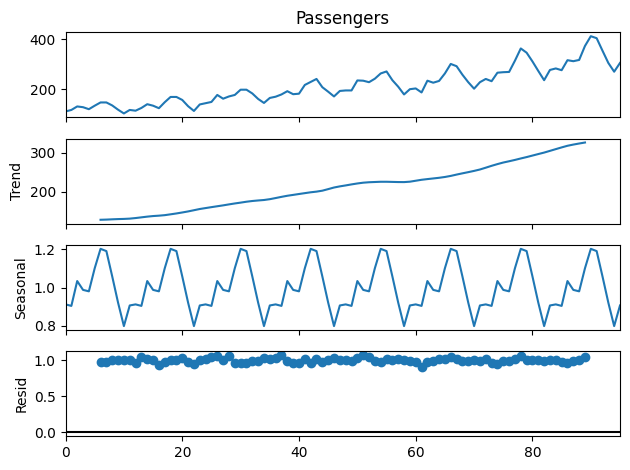

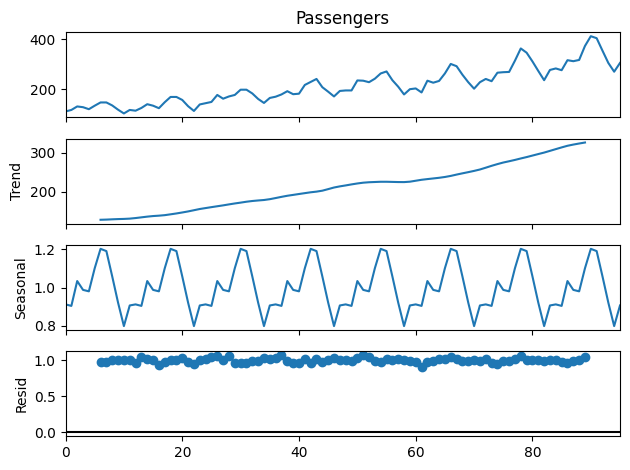

In [57]:
result = seasonal_decompose(finaldf["Passengers"],
                            model ='multiplicative',period=12)
result.plot()

In [58]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.1 MB/s eta 0:00:00


In [59]:
from pmdarima import auto_arima

In [60]:
stepwise_fit = auto_arima(finaldf['Passengers'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          trace = True,
                          error_action ='ignore',
                          suppress_warnings = True,
                          stepwise = True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=619.334, Time=0.67 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=622.012, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=615.965, Time=0.17 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=616.628, Time=0.21 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=618.192, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=617.814, Time=0.18 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=617.881, Time=0.17 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=616.531, Time=0.13 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=0.92 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=618.221, Time=0.05 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=617.862, Time=0.09 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=617.462, Time=0.11 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=616.076, Time=0.11 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=619.394, Time=0.39 sec
 ARIMA(1,1,0)(1,1,0)[12] intercept   

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   96
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -304.983
Date:                            Fri, 03 Nov 2023   AIC                            615.965
Time:                                    04:38:58   BIC                            623.222
Sample:                                         0   HQIC                           618.881
                                             - 96                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2250      0.099     -2.276      0.023      -0.419      -0.031
ar.S.L12      -0.2274      0.089     -2.548      0.011      -0.402      -0.052
sigma2        90.2700     14.667      6.155      0.000      61.524     119.016
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.23
Prob(Q):                              0.97   Prob(JB):                         0.33
Heteroskedasticity (H):               1.77   Skew:                             0.39
Prob(H) (two-sided):                  0.14   Kurtosis:                         2.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [61]:
train = finaldf.iloc[:len(finaldf)-12]
test = finaldf.iloc[len(finaldf)-12:]

from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['Passengers'],
                order = (0, 1, 1),
                seasonal_order =(2, 1, 1, 12))

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Passengers   No. Observations:                   84
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -261.892
Date:                            Fri, 03 Nov 2023   AIC                            533.783
Time:                                    04:38:59   BIC                            545.097
Sample:                                         0   HQIC                           538.282
                                             - 84                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2147      0.112     -1.914      0.056      -0.435       0.005
ar.S.L12      -1.2045      0.876     -1.375      0.169      -2.921       0.512
ar.S.L24      -0.3644      0.246     -1.479      0.139      -0.847       0.118
ma.S.L12       0.9991    116.614      0.009      0.993    -227.561     229.559
sigma2        83.4241   9659.544      0.009      0.993   -1.88e+04     1.9e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.45
Prob(Q):                              1.00   Prob(JB):                         0.29
Heteroskedasticity (H):               2.52   Skew:                             0.44
Prob(H) (two-sided):                  0.03   Kurtosis:                         2.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: >

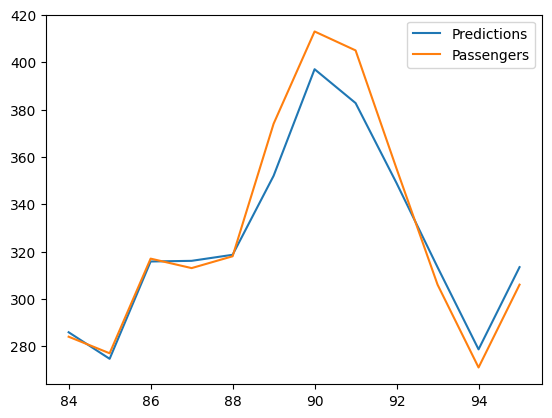

In [62]:
start = len(train)
end = len(train) + len(test) - 1

# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")

# plot predictions and actual values
predictions.plot(legend = True)
test['Passengers'].plot(legend = True)